In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [28]:
Pkg.add(["Images", "Colors", "Plots"])

   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [91a5bcdd] + Plots v1.40.5
    Updating `~/Documents/programming/BME-574-2024/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.5
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [8bb1440f] + DelimitedFiles v1.9.1
  [460bff9d] + ExceptionUnwrapping v0.1.10
  [c87230d0] + FFMPEG v0.4.1
  [28b8d3ca] + GR v0.73.7
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.10.8
  [1019f520] + JLFzf v0.1.7
  [682c06a0] + JSON v0.21.4
  [e6f89c97] + LoggingExtras v1.0.3
  [739be429] + MbedTLS v1.1.9
  [442fdcdd] + Measures v0.3.2
  [4d8831e6] + OpenSSL v1.4.3
  [69de0a69] + Parsers v2.8.1
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.2.0
  [995b91a9] + PlotUtils v1.4.1
  [91a5bcdd] + Plots v1.40.5
  [01d81517] + RecipesPipeline v0.6.12
  [05181044] + RelocatableFolders v1.0.1
  [6c6a2e73] + Scratch v1.2.1
  [992d4aef] + Showoff v1.0.3
  [777a

In [30]:
using Images, Colors, LinearAlgebra, Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


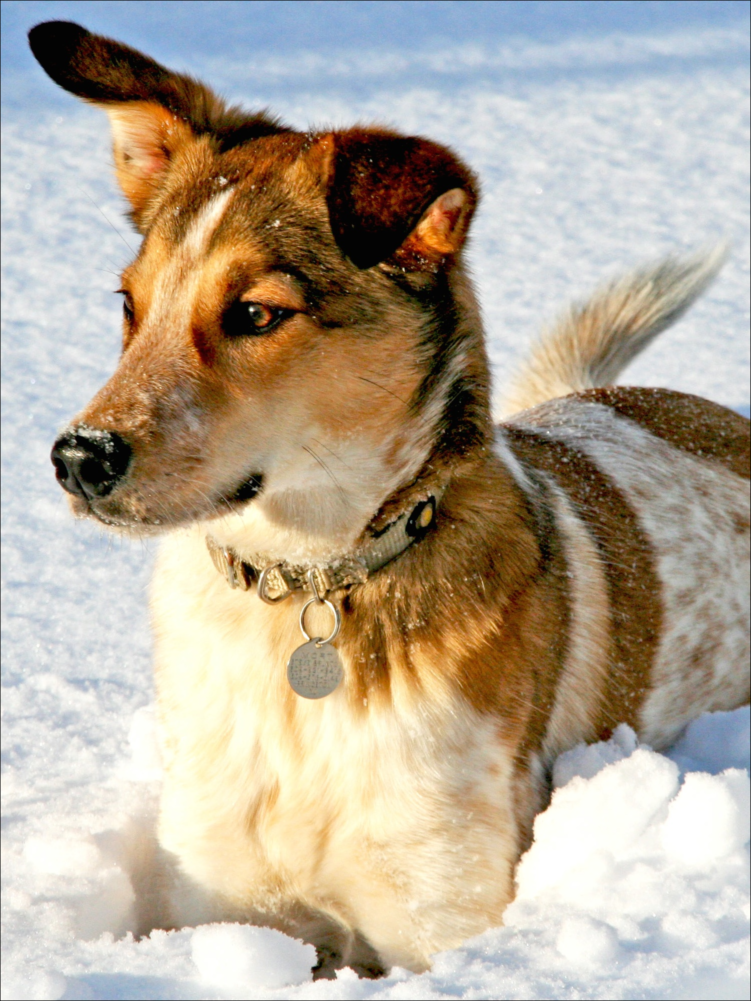

In [18]:
img = load("DATA/dog.jpg")

In [4]:
typeof(img)

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

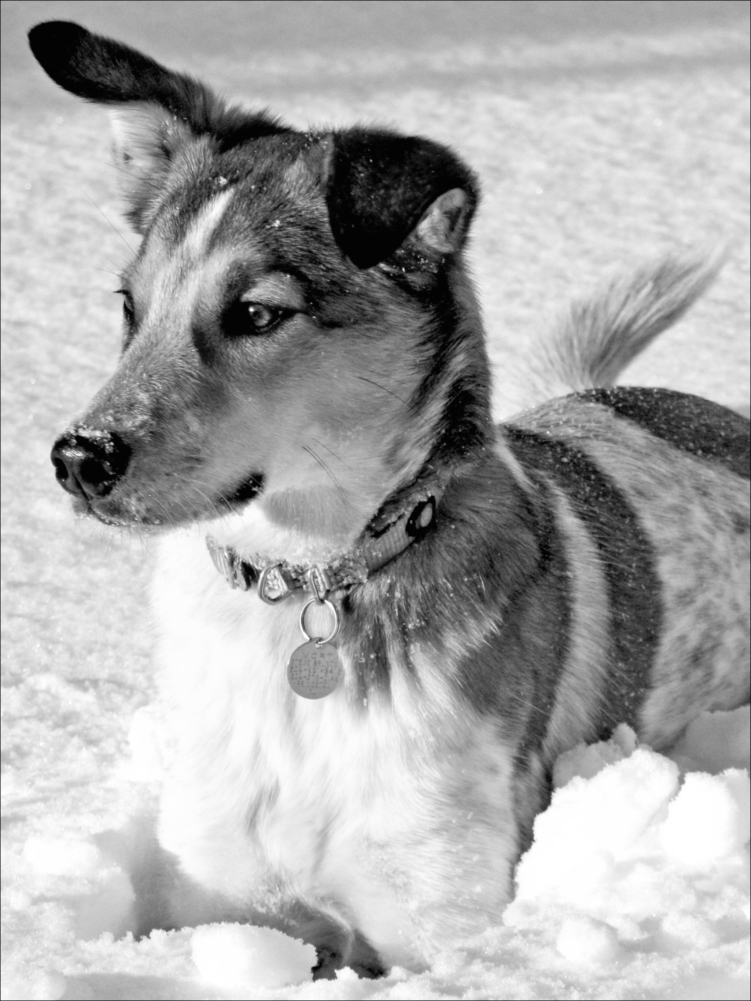

In [10]:
imgg = Gray.(img)

In [54]:
imga = Float64.(imgg) # matrices in Julia are columns x row (different from python)

2000×1500 Matrix{Float64}:
 0.662745  0.658824  0.647059  0.639216  …  0.658824  0.654902  0.643137
 0.647059  0.647059  0.65098   0.65098      0.658824  0.654902  0.643137
 0.654902  0.662745  0.670588  0.670588     0.654902  0.65098   0.643137
 0.639216  0.643137  0.647059  0.643137     0.647059  0.647059  0.643137
 0.65098   0.65098   0.65098   0.65098      0.647059  0.647059  0.65098
 0.65098   0.65098   0.65098   0.65098   …  0.654902  0.654902  0.654902
 0.654902  0.654902  0.658824  0.658824     0.654902  0.65098   0.654902
 0.654902  0.654902  0.658824  0.662745     0.647059  0.643137  0.647059
 0.654902  0.662745  0.662745  0.662745     0.643137  0.643137  0.647059
 0.666667  0.666667  0.654902  0.65098      0.639216  0.643137  0.654902
 0.666667  0.666667  0.654902  0.65098   …  0.643137  0.65098   0.658824
 0.654902  0.662745  0.662745  0.654902     0.654902  0.654902  0.658824
 0.65098   0.658824  0.654902  0.647059     0.662745  0.658824  0.654902
 ⋮                       

In [19]:
u,s,v = svd(imga)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2000×1500 Matrix{Float64}:
 -0.0215076  -0.00409081  -0.0106725   …  -0.0164977    0.0299598
 -0.0215043  -0.00416999  -0.0105942      -0.0181462   -0.0608499
 -0.0214902  -0.00403128  -0.0105579       0.0565689    0.0449963
 -0.0215046  -0.00420569  -0.0105599      -0.027499    -0.0177407
 -0.0215146  -0.00429685  -0.0103688       0.0194183   -0.0058397
 -0.0215052  -0.00429791  -0.0102742   …  -0.0213373   -0.0281026
 -0.0214873  -0.00419941  -0.010354       -0.00875105  -0.0123071
 -0.0214849  -0.00412721  -0.0102681       0.0245818   -0.0200777
 -0.0214931  -0.00416068  -0.00999895     -0.0106969   -0.0101789
 -0.0214892  -0.00415871  -0.0101289       0.0123497    0.0322749
 -0.0214895  -0.00417751  -0.0103035   …   0.0160134   -0.0439743
 -0.0214846  -0.00421713  -0.0102011       0.00933597   0.00354042
 -0.0215025  -0.00417266  -0.010156       -0.0129593    0.0524254
  ⋮                                    ⋱        

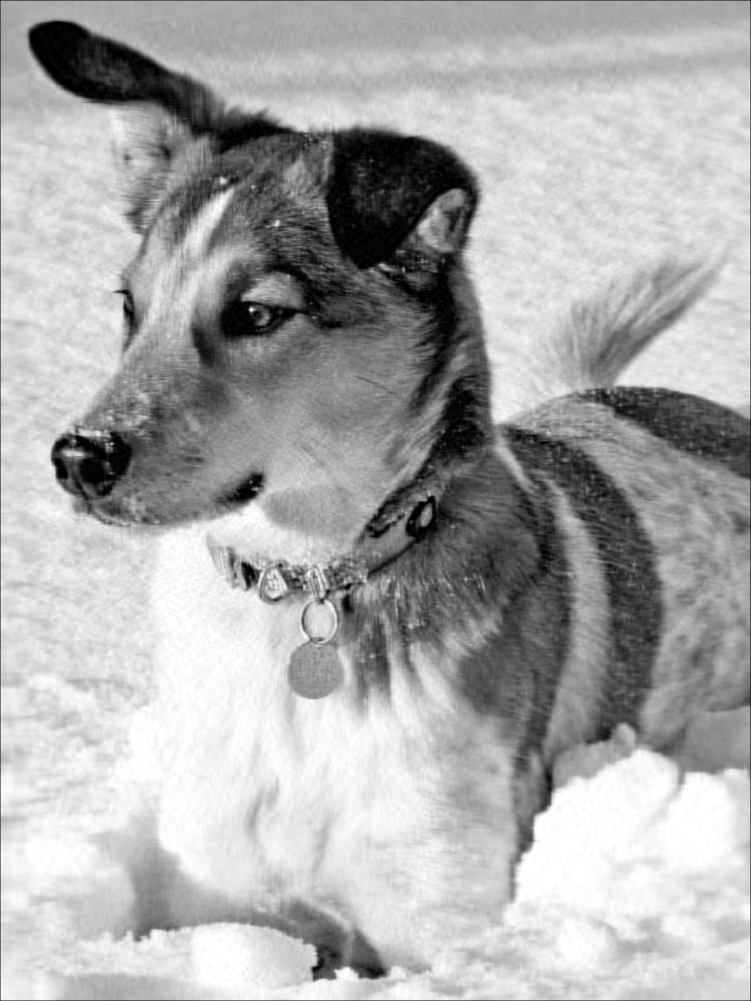

In [82]:
r = 100
Xapprox = u[:,1:r]*Diagonal(s[1:r])*v[:,1:r]'
imgc = Gray.(Xapprox)

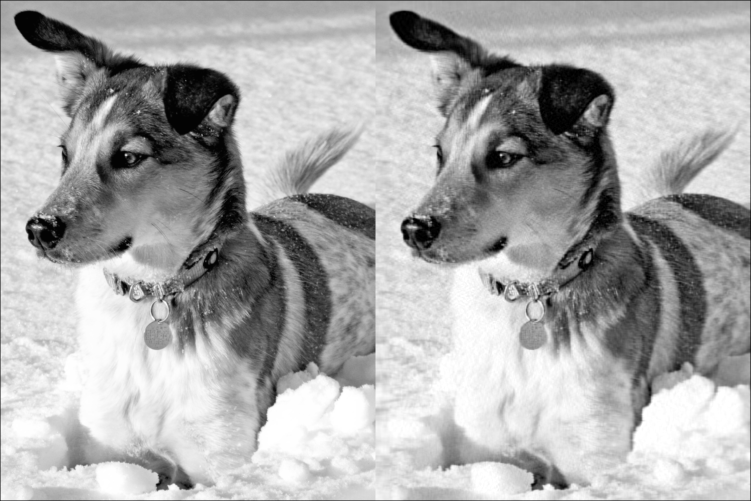

In [83]:
mosaicview(imgg, imgc; nrow=1)

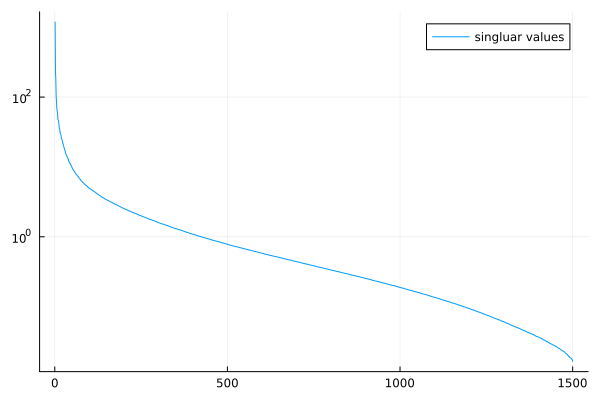

In [48]:
plot(s, yscale=:log10, label="singluar values")

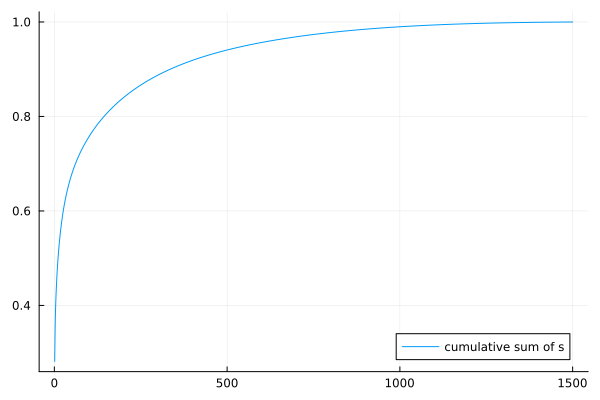

In [45]:
plot(cumsum(s)/sum(s), label="cumulative sum of s")

In [72]:
imga * imga'

2000×2000 Matrix{Float64}:
 660.971  660.71   660.101  660.555  660.795  …   847.804   849.534   849.455
 660.71   660.597  660.021  660.409  660.622      847.62    849.353   849.273
 660.101  660.021  659.594  659.977  660.119      846.959   848.688   848.611
 660.555  660.409  659.977  660.524  660.674      847.726   849.446   849.36
 660.795  660.622  660.119  660.674  660.978      848.017   849.733   849.637
 660.547  660.383  659.858  660.333  660.646  …   847.606   849.329   849.232
 659.915  659.755  659.233  659.696  659.933      846.929   848.656   848.554
 659.734  659.577  659.066  659.53   659.764      846.678   848.402   848.296
 659.942  659.802  659.299  659.764  660.01       846.811   848.537   848.435
 659.806  659.659  659.158  659.63   659.863      846.717   848.439   848.337
 659.912  659.756  659.254  659.729  659.956  …   846.826   848.549   848.445
 659.782  659.63   659.123  659.6    659.823      846.668   848.399   848.303
 660.281  660.136  659.63   660.105  6

In [73]:
imga' * imga

1500×1500 Matrix{Float64}:
 1439.94  1440.72  1439.69  1437.92  …  1219.67  1219.43  1218.72  1217.36
 1440.72  1441.65  1440.69  1438.88     1220.64  1220.4   1219.68  1218.32
 1439.69  1440.69  1439.88  1438.13     1220.01  1219.76  1219.04  1217.68
 1437.92  1438.88  1438.13  1436.54     1218.71  1218.46  1217.73  1216.38
 1436.67  1437.62  1436.84  1435.29     1217.98  1217.74  1217.01  1215.67
 1436.39  1437.34  1436.57  1434.99  …  1218.09  1217.84  1217.11  1215.77
 1436.93  1437.89  1437.14  1435.57     1218.79  1218.53  1217.8   1216.45
 1437.67  1438.63  1437.88  1436.33     1219.39  1219.14  1218.41  1217.06
 1436.79  1437.74  1437.0   1435.45     1218.77  1218.52  1217.8   1216.45
 1435.99  1436.94  1436.19  1434.64     1218.02  1217.78  1217.06  1215.71
 1435.94  1436.89  1436.14  1434.6   …  1217.95  1217.7   1216.98  1215.63
 1437.18  1438.13  1437.38  1435.85     1219.01  1218.76  1218.05  1216.69
 1436.81  1437.75  1437.01  1435.48     1218.63  1218.39  1217.68  1216.3

In [78]:
ev = sqrt.(abs.(eigen(imga * imga').values))

2000-element Vector{Float64}:
    9.04181220422541e-6
    6.980162983836759e-6
    6.572967166202917e-6
    5.82917077691731e-6
    4.953499499311755e-6
    4.029194035539429e-6
    3.5812116878741603e-6
    3.4943924022978495e-6
    3.152898632310509e-6
    2.7817954277542056e-6
    2.5959617360686045e-6
    2.214173280824962e-6
    2.167172150357949e-6
    ⋮
   40.69309208387582
   43.62990365196409
   46.52572558207188
   48.68547037069727
   60.79980548660769
   62.57682841789428
   67.98436126893165
   85.59575643196898
  102.57707165567629
  180.83416689922015
  235.83692576729146
 1188.2380914679482

In [79]:
ev = sqrt.(abs.(eigen(imga' * imga).values))

1500-element Vector{Float64}:
    0.016429782004364422
    0.017232249802679466
    0.017663075730909195
    0.01778841233123201
    0.018133018973223607
    0.018393274117114063
    0.01850031303781399
    0.018619370354510004
    0.018741930070271834
    0.0190414553095118
    0.01920923232553165
    0.019355918953557517
    0.019503805646236383
    ⋮
   40.693092083875804
   43.62990365196422
   46.52572558207197
   48.685470370697146
   60.79980548660764
   62.57682841789428
   67.98436126893162
   85.59575643196902
  102.5770716556761
  180.83416689922007
  235.83692576729152
 1188.2380914679468